In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from keras.datasets import imdb

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
((x,y),(xt,yt)) = imdb.load_data(num_words=10000)

In [4]:
print(len(x))
print(len(y))

25000
25000


In [5]:
print(len(xt))
print(len(yt))

25000
25000


In [6]:
print(x[0])
print(y[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [7]:
word_idx = imdb.get_word_index()

In [18]:
idx_word = dict([value,key] for (key,value) in word_idx.items())
actual_review = ' '.join(idx_word.get(i-3,'?') for i in x[0])
print(actual_review)
print(y[5])

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [20]:
from keras.preprocessing import sequence 

x_train = sequence.pad_sequences(x,maxlen=500)
x_test = sequence.pad_sequences(xt,maxlen=500)

In [21]:
print(x_train.shape)
print(x_test.shape)

(25000, 500)
(25000, 500)


In [22]:
from keras.layers import Embedding, SimpleRNN, Dense
from keras.models import Sequential

In [45]:
model = Sequential()
model.add(Embedding(10000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


### Training using 'adam' optimizer

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [27]:
model.fit(x_train,y,validation_split=0.2,epochs=5,batch_size=120)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 44s 2ms/step - loss: 0.6703 - acc: 0.5765 - val_loss: 0.5886 - val_acc: 0.7292
Epoch 2/5
20000/20000 [==============================] - 43s 2ms/step - loss: 0.5336 - acc: 0.7445 - val_loss: 0.5779 - val_acc: 0.6818
Epoch 3/5
20000/20000 [==============================] - 42s 2ms/step - loss: 0.3228 - acc: 0.8719 - val_loss: 0.4366 - val_acc: 0.8122
Epoch 4/5
20000/20000 [==============================] - 42s 2ms/step - loss: 0.1504 - acc: 0.9514 - val_loss: 0.4629 - val_acc: 0.8030
Epoch 5/5
20000/20000 [==============================] - 43s 2ms/step - loss: 0.0565 - acc: 0.9882 - val_loss: 0.4972 - val_acc: 0.8334


### Re-training using 'rmsprop' optimizer

In [46]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [47]:
model.save("mymodel.h5")

In [37]:
hist = model.fit(x_train,y,validation_split=0.2,epochs=5,batch_size=120)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 42s 2ms/step - loss: 0.6217 - acc: 0.6393 - val_loss: 0.4758 - val_acc: 0.7980
Epoch 2/5
20000/20000 [==============================] - 42s 2ms/step - loss: 0.3847 - acc: 0.8381 - val_loss: 0.4257 - val_acc: 0.8116
Epoch 3/5
20000/20000 [==============================] - 42s 2ms/step - loss: 0.2519 - acc: 0.9006 - val_loss: 0.3906 - val_acc: 0.8372
Epoch 4/5
20000/20000 [==============================] - 43s 2ms/step - loss: 0.1473 - acc: 0.9486 - val_loss: 0.4413 - val_acc: 0.8204
Epoch 5/5
20000/20000 [==============================] - 42s 2ms/step - loss: 0.0839 - acc: 0.9734 - val_loss: 0.4828 - val_acc: 0.8256


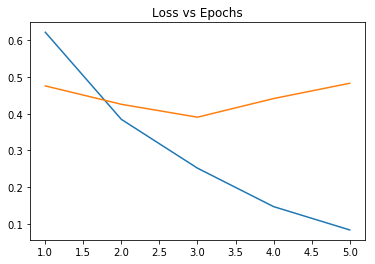

In [38]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1,len(loss)+1)

plt.title('Loss vs Epochs')
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Val Loss')
plt.show()

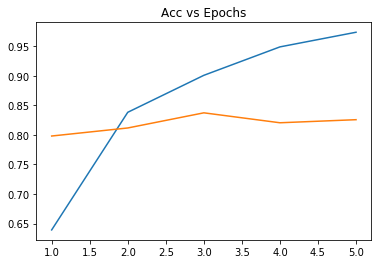

In [44]:
plt.title('Acc vs Epochs')
plt.plot(epochs,acc,label='Training Acc')
plt.plot(epochs,val_acc,label='Val Acc')
plt.show()

In [40]:
!ls

Untitled.ipynb mymodel.h5


In [48]:
model.load_weights("mymodel.h5")

### Re-training using Callbacks
- Checkpoints
- Early Stopping

In [58]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True, save_weights_only=False, mode='auto',period=1)
early_stop = EarlyStopping(monitor='val_acc', patience=1, mode='max')

hist = model.fit(x_train,y,epochs=5,validation_split=0.2,callbacks=[checkpoint,early_stop])

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 109s 5ms/step - loss: 0.3347 - acc: 0.8621 - val_loss: 0.4058 - val_acc: 0.8292
Epoch 2/5
20000/20000 [==============================] - 110s 6ms/step - loss: 0.2359 - acc: 0.9086 - val_loss: 0.4020 - val_acc: 0.8382
Epoch 3/5
20000/20000 [==============================] - 109s 5ms/step - loss: 0.1592 - acc: 0.9420 - val_loss: 0.5192 - val_acc: 0.7870


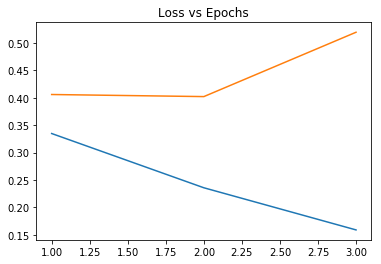

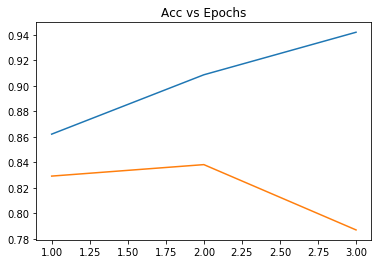

In [59]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1,len(loss)+1)

plt.title('Loss vs Epochs')
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Val Loss')
plt.show()

plt.title('Acc vs Epochs')
plt.plot(epochs,acc,label='Training Acc')
plt.plot(epochs,val_acc,label='Val Acc')
plt.show()

In [60]:
model.evaluate(x_train,y)

25000/25000 [==============================] - 38s 2ms/step


[0.18435969198703767, 0.93336]

In [62]:
model.evaluate(x_test,yt)

25000/25000 [==============================] - 38s 2ms/step


[0.5296027182769776, 0.78456]

In [64]:
!ls

best_model.h5 bets_model.h5 imdb.ipynb    mymodel.h5
